plotBase=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
plotX=[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 29 29 29 29 29 29]
plotY=[ 5  9 13 17 21 25 29 33 37 41 45 49 53 57 61 65 69 69 69 69]


<ipython-input-1-91a1caa41497>:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


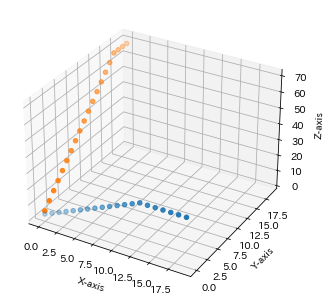

In [1]:
# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# TODO:3次元プロットで2変数の線形飽和モデルをプロットする

plotBase = list(range(20))
plotX = returnListForBranchModel(inputList=plotBase, branchIndex=13, a=2, b=3)
plotY = returnListForBranchModel(inputList=plotBase, branchIndex=16, a=4, b=5)
plotX = np.array(plotX)
plotY = np.array(plotY)
plotZ = plotX+plotY

# TODO:関数コール回数が同じだが、2変数が異なる変数かつそういったものが多数ある場合が分岐線

print(f"plotBase={plotBase}\nplotX={plotX}\nplotY={plotY}")

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plotZero = [0]*len(plotBase)
ax.scatter(plotBase, plotZero, plotX)
ax.scatter(plotZero, plotBase, plotY)

dataset01 = pd.DataFrame({"X": plotBase, "Y": plotZero, "Z": plotX})
dataset02 = pd.DataFrame({"X": plotZero, "Y": plotBase, "Z": plotY})

In [2]:
# ２点間を繋ぐ直線を返す関数
# 引数p1, p2 は [x, y, z] のような3つの要素で構成されるリスト
def returnStraightLineDataBetween2Points(p1=[], p2=[]):
    if (len(p1) == 0 or len(p2) == 0):
        warnings.warn("引数が条件（要素数3のリストx2）を満たしていません")
        
    ax = p1[0]
    ay = p1[1]
    az = p1[2]
    
    bx = p2[0]
    by = p2[1]
    bz = p2[2]
    
    iterList = np.arange(0, 1.01, 0.01)
    
    retX = []
    retY = []
    retZ = []
    
    for t in iterList:
        x = (1-t)*ax + t*bx
        y = (1-t)*ay + t*by
        z = (1-t)*az + t*bz
        
        retX.append(x)
        retY.append(y)
        retZ.append(z)
        
    returnDict = {"x":retX, "y":retY, "z":retZ}
    
    return(returnDict)

In [3]:
xDataSet01 = dataset01["X"].tolist()
zDataSet01 = dataset01["Z"].tolist()
yDataSet02 = dataset02["Y"].tolist()
zDataSet02 = dataset02["Z"].tolist()

In [4]:
branchIndexInDataSet01 = returnBranchIndexOfList(
    inputListX=xDataSet01, inputListY=zDataSet01)
branchIndexInDataSet02 = returnBranchIndexOfList(
    inputListX=yDataSet02, inputListY=zDataSet02)

# 説明変数が2つの分岐モデルを実装するにあたってのテストなど

1. ~\[X, Y, Z\] == \[0, Y, Z\], \[X, 0, Z\] を満たすデータ群を抽出~ -> 変数 `dataset01`, `dataset02` 
2. ~抽出した2つのデータ群から分岐点を抽出~ -> 変数 `branchIndexInDataSet01`, `branchIndexInDataSet01` 
3. 抽出した分岐点を繋ぐ直線を定義
4. データ群を定義した直線で2つに分割
5. 分割された2平面ごとにモデルを構築

In [5]:
branchIndexInDataSet01

13

In [6]:
branchIndexInDataSet02

16

In [7]:
pointA = dataset01.iloc[branchIndexInDataSet01]
p1 = [pointA["X"],pointA["Y"],pointA["Z"]]
print(pointA)
print(p1)

X    13
Y     0
Z    29
Name: 13, dtype: int64
[13, 0, 29]


In [8]:
pointB = dataset02.iloc[branchIndexInDataSet02]
p2 = [pointB["X"],pointB["Y"],pointB["Z"]]
print(pointB)
print(p2)

X     0
Y    16
Z    69
Name: 16, dtype: int64
[0, 16, 69]


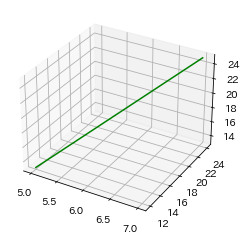

In [9]:
p1 = [5, 12, 13]
p2 = [7, 24, 25]
lineDataDict = returnStraightLineDataBetween2Points(p1=p1, p2=p2)

fig = plt.figure()
ax = plt.axes(projection ='3d')
x = lineDataDict["x"]
y = lineDataDict["y"]
z = lineDataDict["z"]

ax.plot3D(x, y, z, 'green')
ax.plot3D(p1[0], p1[1], p1[2])
ax.plot3D(p2[0], p2[1], p2[2])

# plotZero = [0]*len(plotBase)
# ax.scatter(plotBase, plotZero, plotX)
# ax.scatter(plotZero, plotBase, plotY)

plt.show()

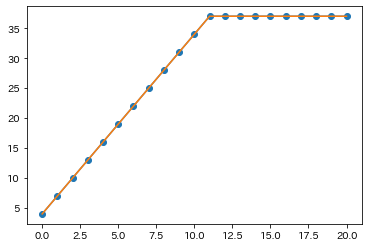

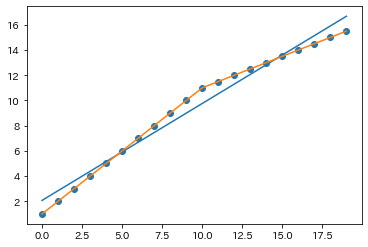

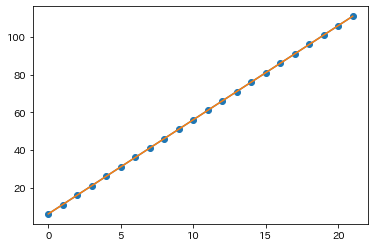

In [10]:
# プロジェクト別ゼミ用資料作成

# ipynb形式のライブラリのインポート
# %run ./lib/lib.ipynb

branchIndex = 11
dataBase1 = list(range(branchIndex))
dataBase2 = [branchIndex]*(21-11)
dataList1 = [3*x + 4 for x in dataBase1]
dataList2 = [3*x + 4 for x in dataBase2]
dataBase2 = list(range(11, 21))
dataListY = dataList1+dataList2
dataListX = dataBase1+dataBase2

# プロット
plt.figure()
plt.scatter(dataListX, dataListY)
# 分岐モデル
modelBranch = ModelBranch(trainX=dataListX, trainY=dataListY)
modelBranch.calcLr()
predictedY = modelBranch.predict(dataListX)
plt.plot(dataListX, predictedY)
# 分岐モデル2
modelBranch2 = ModelBranch2(trainX=dataListX, trainY=dataListY)
modelBranch2.calcLr()
predictedY = modelBranch2.predict(dataListX)
plt.plot(dataListX, predictedY)

# データ２：分岐点で異なる線形モデルに変化
branchIndex = 10
dataBase1 = list(range(branchIndex))
dataBase2 = list(range(branchIndex, 20))
dataList1 = [x + 1 for x in dataBase1]
dataList2 = [0.5*x + 6 for x in dataBase2]
dataListY = dataList1+dataList2
dataListX = dataBase1+dataBase2

# プロット
plt.figure()
plt.scatter(dataListX, dataListY)
# 分岐モデル
modelBranch = ModelBranch(trainX=dataListX, trainY=dataListY)
modelBranch.calcLr()
predictedY = modelBranch.predict(dataListX)
plt.plot(dataListX, predictedY)
# 分岐モデル2
modelBranch2 = ModelBranch2(trainX=dataListX, trainY=dataListY)
modelBranch2.calcLr()
predictedY = modelBranch2.predict(dataListX)
plt.plot(dataListX, predictedY)


# データ３：分岐点無し
branchIndex = 22
dataBase1 = list(range(branchIndex))
dataListY = [5*x + 6 for x in dataBase1]
dataListX = dataBase1


# プロット
plt.figure()
plt.scatter(dataListX, dataListY)
# 分岐モデル
modelBranch = ModelBranch(trainX=dataListX, trainY=dataListY)
modelBranch.calcLr()
predictedY = modelBranch.predict(dataListX)
plt.plot(dataListX, predictedY)
# 分岐モデル2
modelBranch2 = ModelBranch2(trainX=dataListX, trainY=dataListY)
modelBranch2.calcLr()
predictedY = modelBranch2.predict(dataListX)
plt.plot(dataListX, predictedY)

In [11]:


benchmarkNames =  ["cg", "ep", "ft", "is", "lu", "mg"]
# classes = ["A", "B", "C", "D"]
classes = ["B"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]
targetIndex = -1
csvDirPath = "./csv_files/"
modelNames = ["ModelBranch", "ModelIp", "ModelLog", "ModelLin"]
modelNames2 = ["ModelBranch2", "ModelIp", "ModelLog", "ModelLin"]

dfByDatumCG = returnDFSummarizedData(
    benchmarkNames=benchmarkNames, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath, modelNames=modelNames)
dfByDatumCG2 = returnDFSummarizedData(
    benchmarkNames=benchmarkNames, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath, modelNames=modelNames2)

dictForLatexTable = {}
dictForLatexTable2 = {}
numOfData = 0
numOfData2 = 0

for benchmarkName in benchmarkNames:
    dictForLatexTable[benchmarkName] = dfByDatumCG[dfByDatumCG["benchmarkName"] == benchmarkName]
    numOfData += len(
        dfByDatumCG[dfByDatumCG["benchmarkName"] == benchmarkName])
    dictForLatexTable2[benchmarkName] = dfByDatumCG2[dfByDatumCG2["benchmarkName"] == benchmarkName]
    numOfData2 += len(
        dfByDatumCG2[dfByDatumCG2["benchmarkName"] == benchmarkName])


listForDF = []
for benchmarkName in benchmarkNames:
    listForDF.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable[benchmarkName], modelNames=modelNames))
DF = pd.DataFrame(listForDF)
print(DF.to_latex(index=False))

listForDF2 = []
for benchmarkName in benchmarkNames:
    listForDF2.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable2[benchmarkName], modelNames=modelNames2))
DF = pd.DataFrame(listForDF2)
print(DF.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
benchmarkName & ModelBranch &      ModelIp &      ModelLog &     ModelLin \\
\midrule
           CG & 18(0.0,0.0) &         0(-) & 13(11.7,11.7) &  69(0.0,0.0) \\
           EP &        0(-) &         0(-) &          0(-) & 100(0.0,0.0) \\
           FT &        0(-) &   9(0.0,0.0) &          0(-) &  91(0.0,0.0) \\
           IS &        0(-) &  19(0.0,0.0) &          0(-) &  81(0.0,0.0) \\
           LU &        0(-) & 30(0.0,25.9) &          0(-) &  70(0.0,0.0) \\
           MG &        0(-) &         0(-) &    3(0.5,0.5) &  97(0.0,3.4) \\
\bottomrule
\end{tabular}

\begin{tabular}{lllll}
\toprule
benchmarkName & ModelBranch2 &      ModelIp &      ModelLog &     ModelLin \\
\midrule
           CG &  18(0.0,0.0) &         0(-) & 13(11.7,11.7) &  69(0.0,0.0) \\
           EP &         0(-) &         0(-) &          0(-) & 100(0.0,0.0) \\
           FT &         0(-) &   9(0.0,0.0) &          0(-) &  91(0.0,0.0) \\
           IS &         0(-) &  19(0.0,0